<a href="https://colab.research.google.com/github/DaJaCruz/PhD/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math
import pandas as pd # Pandas dataframe (very common in ML)

# Uncomment line below if you want to enable live rotation of the surface plots.
#%matplotlib notebook
#
from matplotlib import cm # to change colors of surface plots
# Set the color scheme used in every plot:
#set_cm = cm.inferno # viridis, inferno, copper, PuBu, cool, coolwarm, hsv
#
seed = 1987 # set a random seed to replicate results
np.random.seed(seed)

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.style.use("seaborn") # style for plotting that comes from seaborn
FS = 26  # Font Size
plt.rcParams['axes.facecolor'] = (0.97, 0.97, 0.97)
plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams["font.family"] = "sans"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['font.size'] = FS
params = {"ytick.color": (0, 0, 0),
          "xtick.color": (0, 0, 0),
          "grid.color": (.9, .9, .9),
          "text.color": (0, 0, 0),
          "axes.labelcolor": (0, 0, 0),
          "axes.edgecolor": (.15, .15, .15)#,
          #"text.usetex": True
          }
plt.rcParams.update(params)
linewidth=3.0

In [3]:
url = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/3PointBendingData.csv?token=GHSAT0AAAAAACAAJYJIJMI3PATDKSCVODL2ZAQSUDQ'
df = pd.read_csv(url, delimiter=';')


In [11]:
from sklearn.model_selection import train_test_split

X_data = df.loc[:,['Input_1','Input_2','Input_3','Input_4','Input_5','Input_6','Input_7',]].values # uniformly spaced points
Y_data = df.loc[:,['Output_1','Output_2']].values # function values at x_data

# Recreate the grid of points that is necessary to plot surfaces (by reshaping)
#X1_grid = np.reshape(X_data[:,0],( round( np.sqrt(len(X_data)) ), round( np.sqrt(len(X_data)) ) ))
#X2_grid = np.reshape(X_data[:,1],( round( np.sqrt(len(X_data)) ), round( np.sqrt(len(X_data)) ) ))
#Y_grid = np.reshape(y_data,( round( np.sqrt(len(X_data)) ), round( np.sqrt(len(X_data)) ) ))

# Train/test split like we did before!
from sklearn.model_selection import train_test_split

testset_ratio = 0.4 # ratio of test set points from the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data,
                                                    test_size=testset_ratio#,random_state=seed
                                                    )

X_test = X_data[0:36,:]
X_train = X_data[36:91,:]

Y_test = Y_data[0:36,:]
Y_train = Y_data[36:91,:]

In [12]:

from sklearn.preprocessing import StandardScaler
# Scaling inputs with a Standard Scaler:
scaler_x = StandardScaler()
scaler_x.fit(X_train) # fit the scaler to the input data
#
X_train_scaled=scaler_x.transform(X_train) # scale the input training data
X_test_scaled=scaler_x.transform(X_test)  # scale the input testing data
X_data_scaled=scaler_x.transform(X_data) # scale the input data (the whole dataset)

# Now scaling outputs also using StandardScaler:
#Y_train = Y_train.reshape(-1, 1) # recall that we need to convert the 1D array vector into a 2D array vector
#Y_test = Y_test.reshape(-1, 1)   # recall that we need to convert the 1D array vector into a 2D array vector
#Y_data = Y_data.reshape(-1, 1)   # recall that we need to convert the 1D array vector into a 2D array vector
#
scaler_y = StandardScaler()
scaler_y.fit(Y_train) # fit the scaler to the output data
#
Y_train_scaled=scaler_y.transform(Y_train) # scale the output training data
Y_test_scaled=scaler_y.transform(Y_test)  # scale the output testing data
Y_data_scaled=scaler_y.transform(Y_data) # scale the output data (the whole dataset)

In [41]:
# As expected, the code for multidimensional ANNs is basically the same as the 1D case.
from tensorflow import keras
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from keras.models import Sequential # to create a feedforward neural network
from keras.layers.core import Dense # to create a feedforward neural network with dense layers
from keras.wrappers.scikit_learn import KerasRegressor # a new version will use scikeras
from keras.callbacks import EarlyStopping # a strategy for complexity control
from sklearn.model_selection import GridSearchCV # simple (brute force) approach to find better hyperparameters.
#
# Function to create the ANN model
def create_ANN(input_dimensions=1,neurons1=10,neurons2=10,neurons3=10,neurons4=10,neurons5=10,
                 activation='relu',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    model.add(Dense(neurons3, activation=activation)) # UNCOMMEND If you want a third hidden layer
    model.add(Dense(neurons4, activation=activation)) # UNCOMMENT if you want a fourth hidden layer, etc.
    model.add(Dense(neurons5, activation=activation)) # UNCOMMENT if you want a fourth hidden layer, etc.
    model.add(Dense(2)) # output layer with just one neuron (we only have one output)
    model.compile(loss='mse', optimizer=optimizer) # choose error metric and optimizer.
    return model

In [19]:
EarlyStopping??

In [47]:
# If you don't want to use Early Stopping, then comment the command below.
early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                               min_delta=0.0001, # minimum change in the monitored quantity to qualify as an
                                              # improvement (if 0, then even small improvements count)
                               patience=100, # be patient for a few epochs to verify evolution of loss
                               mode='min'
                               ) # in min mode, training stops when val_loss stops decreasing
# Summary of this early_stopping criterion:
# stop training when there is no improvement in the loss for 30 consecutive epochs.

neurons1=50 # number of neurons in hidden layer 1
neurons2=50 # number of neurons in hidden layer 2
neurons3=50
neurons4=50
neurons5=50
epochs = 1000 # number of epochs
batch_size = len(X_train) # number of samples in each batch
optimizer = Adam(learning_rate=0.01) # specifying the learning rate value for the optimizer (PLAY WITH THIS!)
ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                           input_dimensions=np.shape(X_train)[1], # the input dimensions (here it is 2)
                           neurons1=neurons1, # number of neurons in the first hidden layer
                           neurons2=neurons2, # number of neurons in the second hidden layer
                           neurons3=neurons3,
                           neurons4=neurons4,
                           neurons5=neurons5,
                           batch_size=batch_size, # define the number of samples in each batch
                           epochs=epochs, # number of epochs
                           optimizer=optimizer, # optimizer
                           callbacks=[early_stopping], # include early stopping
                           validation_data=(X_test_scaled, Y_test_scaled)) # validation data to compute loss
# Train the model:
history = ANN_model.fit(X_train_scaled, Y_train_scaled)

<ipython-input-47-e141869cbce4>:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN


Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 1.0054 - val_loss: 0.4762
Epoch 2/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.7880 - val_loss: 0.3484
Epoch 3/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.5515 - val_loss: 0.2166
Epoch 4/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.3214 - val_loss: 0.1927
Epoch 5/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.1815 - val_loss: 0.3906
Epoch 6/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.2623 - val_loss: 0.3424
Epoch 7/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.2020 - val_loss: 0.1972
Epoch 8/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.1098 - val_loss: 0.1586
Epoch 9/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.1059 - val_loss: 0.1579
Epoch 10/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.1375 - val_loss: 0.1478
Epoch 11/10

In [48]:
Y_data_ANNpred_scaled = history.model.predict(X_data_scaled)
Y_data_ANNpred = scaler_y.inverse_transform(Y_data_ANNpred_scaled) 

3/3 [==============================] - 0s 5ms/step


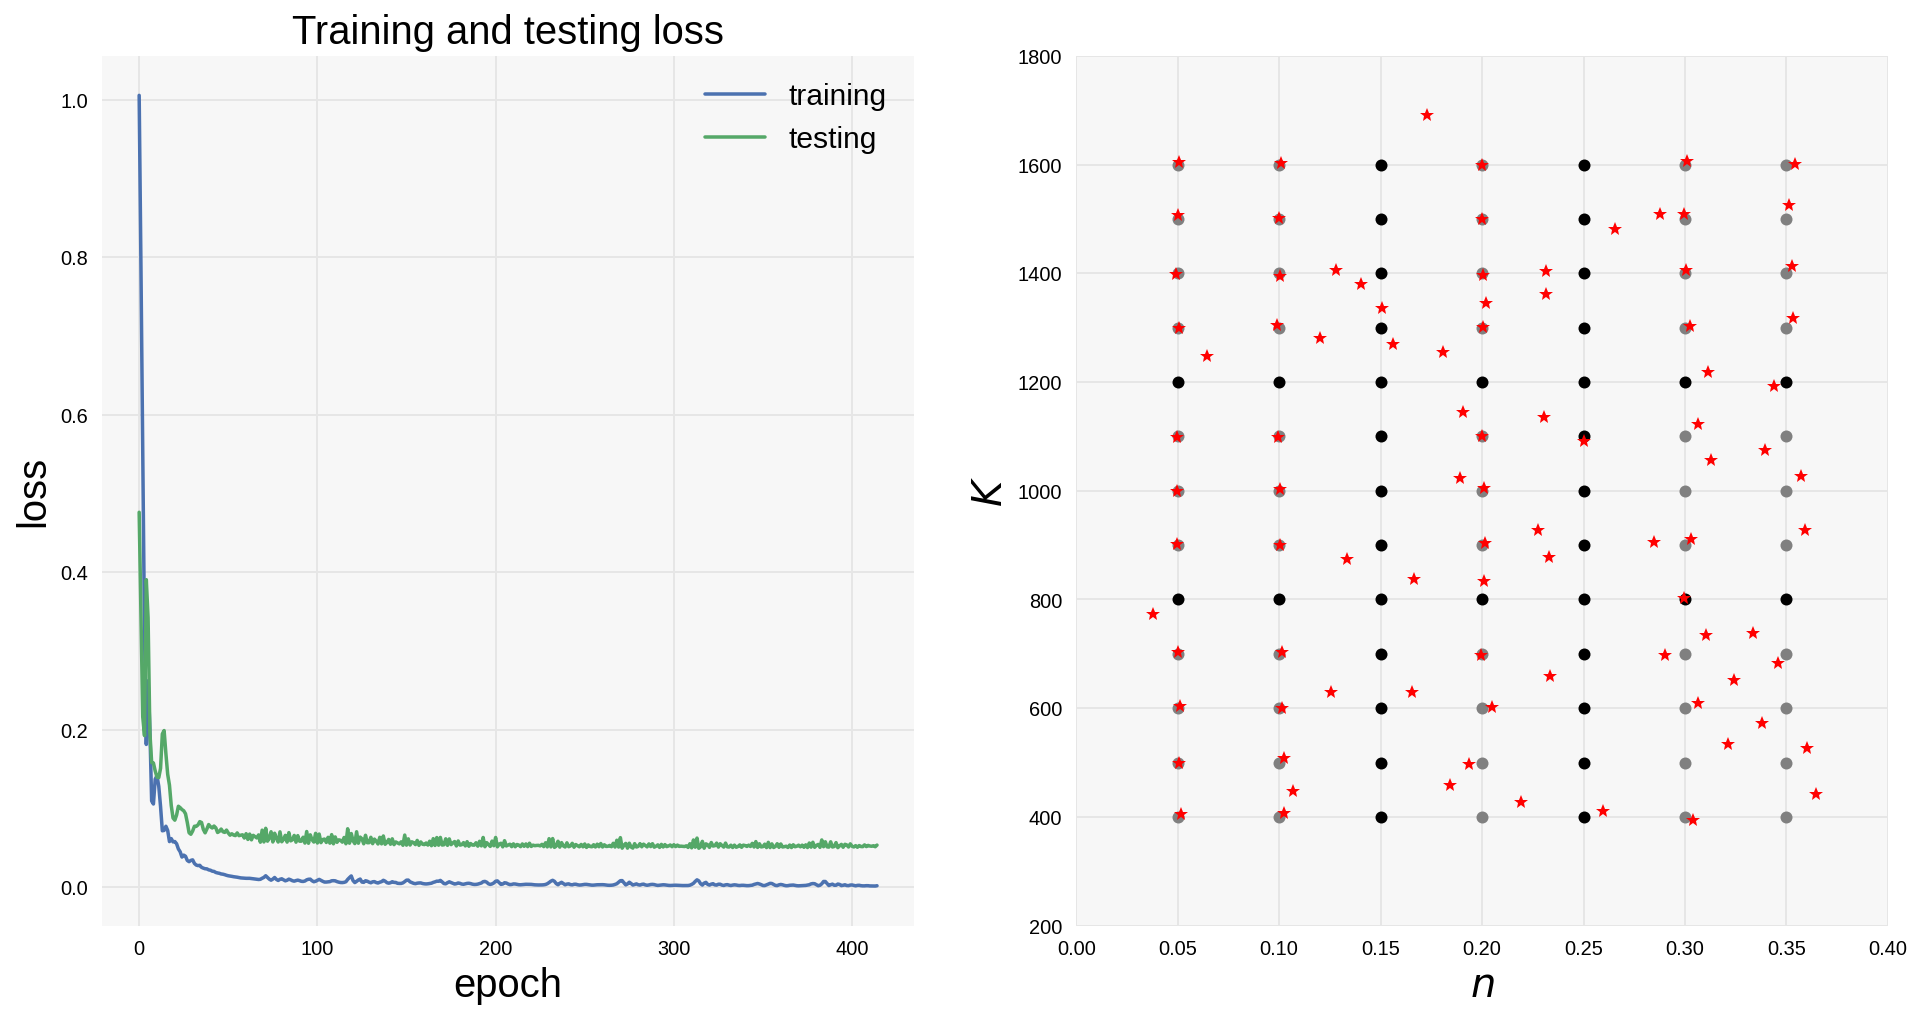

In [49]:
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)

ax1_ANN.plot(history.history['loss'])
ax1_ANN.plot(history.history['val_loss'])
ax1_ANN.set_title('Training and testing loss', fontsize=20)
ax1_ANN.set_ylabel('loss', fontsize=20)
ax1_ANN.set_xlabel('epoch', fontsize=20)
ax1_ANN.legend(['training', 'testing'], loc='upper right', fontsize=15)


#x2_ANN.plot(X_data[:,0], y_data[:,0], 'o', color='black') # show ground truth function$
ax2_ANN.plot(Y_train[:,1], Y_train[:,0], 'o', markersize=6, color='gray', label="training points") # show training data
ax2_ANN.plot(Y_test[:,1], Y_test[:,0], 'o', markersize=6, color='black', label="testing points") # show training data

ax2_ANN.plot(Y_data_ANNpred[:,1], Y_data_ANNpred[:,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax2_ANN.set_ylabel('$K$', fontsize=20)
ax2_ANN.set_xlabel('$n$', fontsize=20)
#ax2_ANN.legend(loc='best', fontsize=15)
ax2_ANN.set_xlim([0, 0.4])
ax2_ANN.set_ylim([200, 1800])

# Create figure with specified size
fig_ANN.set_size_inches(16, 8)

